# Covid19 Data Analysis

### Importing Module

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
print("All modules imported")

All modules imported


### Importing Dataset

In [2]:
corona_dataset= pd.read_csv("covid19_confirmed.csv")
corona_dataset.shape

(268, 285)

In [3]:
corona_dataset.tail(5)

,Province/State,Country/Region,Lat,Long,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,...,10/19/2020,10/20/2020,10/21/2020,10/22/2020,10/23/2020,10/24/2020,10/25/2020,10/26/2020,10/27/2020,10/28/2020
263,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,47616,48129,48628,49134,49579,49989,50442,50952,51528,51948
264,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
265,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2056,2057,2057,2057,2060,2060,2060,2060,2060,2061
266,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,15897,15982,16000,16035,16095,16117,16117,16200,16243,16285
267,NaN,Zimbabwe,-19.015438,29.154857,0,0,0,0,0,0,...,8159,8187,8215,8242,8257,8269,8276,8303,8315,8320


### Dropping useless columns

In [4]:
corona_dataset.drop(['Lat', 'Long'], axis= 1, inplace= True)

In [5]:
corona_dataset.head(5)

,Province/State,Country/Region,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,...,10/19/2020,10/20/2020,10/21/2020,10/22/2020,10/23/2020,10/24/2020,10/25/2020,10/26/2020,10/27/2020,10/28/2020
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,40287,40357,40510,40626,40687,40768,40833,40937,41032,41145
1,NaN,Albania,0,0,0,0,0,0,0,0,...,17350,17651,17948,18250,18556,18858,19157,19445,19729,20040
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,54616,54829,55081,55357,55630,55880,56143,56419,56706,57026
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,3623,3623,3811,3811,4038,4038,4038,4325,4410,4517
4,NaN,Angola,0,0,0,0,0,0,0,0,...,7829,8049,8338,8582,8829,9026,9381,9644,9871,10074


### Aggragate Country/Region Columns using groupy()

In [6]:
corona_aggragated= corona_dataset.groupby('Country/Region').sum()

In [7]:
corona_aggragated.tail(5)

,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,1/31/2020,...,10/19/2020,10/20/2020,10/21/2020,10/22/2020,10/23/2020,10/24/2020,10/25/2020,10/26/2020,10/27/2020,10/28/2020
Country/Region,,,,,,,,,,,,,,,,,,,,,
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,47616,48129,48628,49134,49579,49989,50442,50952,51528,51948
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
Yemen,0,0,0,0,0,0,0,0,0,0,...,2056,2057,2057,2057,2060,2060,2060,2060,2060,2061
Zambia,0,0,0,0,0,0,0,0,0,0,...,15897,15982,16000,16035,16095,16117,16117,16200,16243,16285
Zimbabwe,0,0,0,0,0,0,0,0,0,0,...,8159,8187,8215,8242,8257,8269,8276,8303,8315,8320


In [8]:
corona_aggragated.shape

(190, 281)

### Vizualization

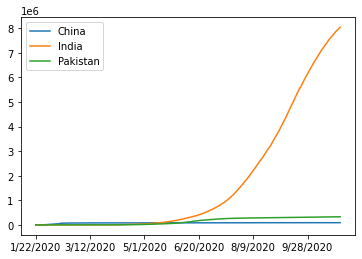

In [9]:
corona_aggragated.loc['China'].plot()
corona_aggragated.loc['India'].plot()
corona_aggragated.loc['Pakistan'].plot()
plt.legend()


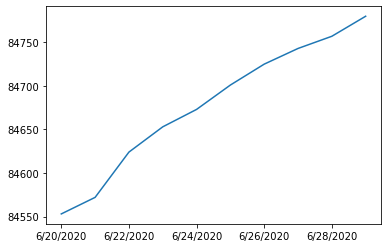

In [10]:
corona_aggragated.loc['China'][150:160].plot()

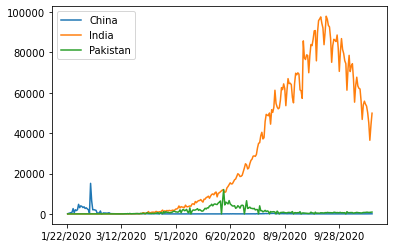

In [11]:
corona_aggragated.loc['China'].diff().plot()
corona_aggragated.loc['India'].diff().plot()
corona_aggragated.loc['Pakistan'].diff().plot()
plt.legend()

In [12]:
corona_aggragated.loc['India'].diff().min()

0.0

In [13]:
corona_aggragated.loc['India'].diff().max()

97894.0

#### Finding the maximum infection rate for all countries

In [14]:
countries= list(corona_aggragated.index)
max_infection= []
for c in countries:
    max_infection.append(corona_aggragated.loc[c].diff().max())
corona_aggragated['max_infection'] = max_infection

In [15]:
corona_aggragated.head()

,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,1/31/2020,...,10/20/2020,10/21/2020,10/22/2020,10/23/2020,10/24/2020,10/25/2020,10/26/2020,10/27/2020,10/28/2020,max_infection
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,40357,40510,40626,40687,40768,40833,40937,41032,41145,915.0
Albania,0,0,0,0,0,0,0,0,0,0,...,17651,17948,18250,18556,18858,19157,19445,19729,20040,311.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,54829,55081,55357,55630,55880,56143,56419,56706,57026,675.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,3623,3811,3811,4038,4038,4038,4325,4410,4517,299.0
Angola,0,0,0,0,0,0,0,0,0,0,...,8049,8338,8582,8829,9026,9381,9644,9871,10074,355.0


#### Creating New Dataframe

In [16]:
corona_data= pd.DataFrame(corona_aggragated['max_infection'])

In [17]:
corona_data.head()

,max_infection
Country/Region,
Afghanistan,915.0
Albania,311.0
Algeria,675.0
Andorra,299.0
Angola,355.0


- Importing WorldHappinessReport
- Finding corelation between WorldHappinessReport and Covid19 cases

In [18]:
happiness_report = pd.read_csv("World_happiness.csv")

In [19]:
happiness_report.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


#### Dropping Useless Colmns because it doesn't needed in our analysis

In [20]:
useless_colm=['Overall rank', 'Score', 'Generosity', 'Perceptions of corruption']

In [21]:
happiness_report.drop(useless_colm, axis = 1, inplace= True)
happiness_report.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


#### Chanding indices of the dataframe

In [22]:
happiness_report.set_index("Country or region", inplace= True)

In [23]:
happiness_report.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


#### Join two prepared dataset

In [24]:
data=corona_data.join(happiness_report, how = 'inner')
data.head()

,max_infection,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,915.0,0.350,0.517,0.361,0.000
Albania,311.0,0.947,0.848,0.874,0.383
Algeria,675.0,1.002,1.160,0.785,0.086
Argentina,18326.0,1.092,1.432,0.881,0.471
Armenia,2474.0,0.850,1.055,0.815,0.283


### Correlation Matrix

In [25]:
data.corr()

,max_infection,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infection,1.000000,0.206034,0.148159,0.221720,0.090060
GDP per capita,0.206034,1.000000,0.757521,0.859431,0.394799
Social support,0.148159,0.757521,1.000000,0.751632,0.456317
Healthy life expectancy,0.221720,0.859431,0.751632,1.000000,0.423146
Freedom to make life choices,0.090060,0.394799,0.456317,0.423146,1.000000


### Visualization of the result


In [26]:
data.head()

,max_infection,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,915.0,0.350,0.517,0.361,0.000
Albania,311.0,0.947,0.848,0.874,0.383
Algeria,675.0,1.002,1.160,0.785,0.086
Argentina,18326.0,1.092,1.432,0.881,0.471
Armenia,2474.0,0.850,1.055,0.815,0.283


#### Plotting GDP VS Max infection rate

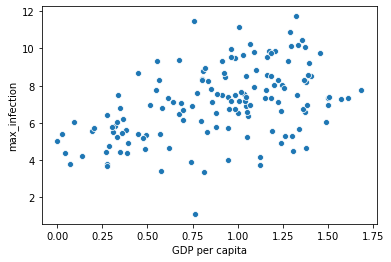

In [27]:
x = data['GDP per capita']
y = data['max_infection']
sns.scatterplot(x,np.log(y))

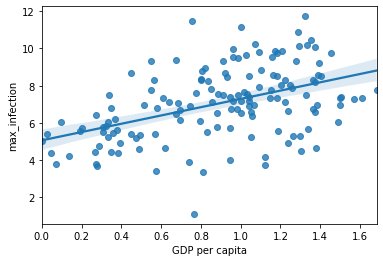

In [28]:
sns.regplot(x,np.log(y))

#### Social Support vs Max infection

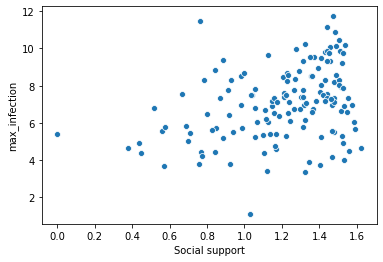

In [29]:
x = data['Social support']
y = data['max_infection']
sns.scatterplot(x,np.log(y))

#### Healthy life expectancy vs max infection

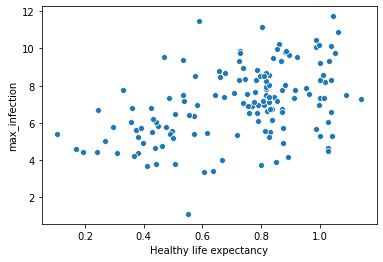

In [30]:
x = data['Healthy life expectancy']
y = data['max_infection']
sns.scatterplot(x,np.log(y))

#### Freedom to make life choices vs max infection

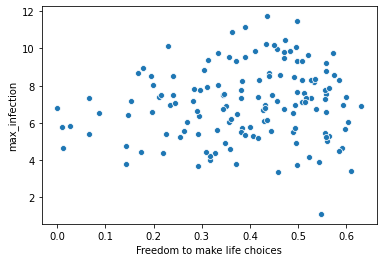

In [31]:
x = data['Freedom to make life choices']
y = data['max_infection']
sns.scatterplot(x,np.log(y))